## Multiple Linear Regression Task 1: Predicting Admission Chance 

- Multiple Regression is a general term that refers to any regression model with more than one predictor (independent variable). It can be linear or non-linear.

- Multiple Linear Regression is a specific type of multiple regression where the relationship between the dependent variable and multiple independent variables is assumed to be linear.

### Step 1: Import Libraries and Load Data

In [26]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [27]:
df = pd.read_csv(r"A:\Code\PY\DSc\datasets\02-multiple-regression\admission_chance.csv")
df

,Serial No,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [28]:
df.drop(["Serial No", "Research"], axis=1, inplace=True)

In [29]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Chance of Admit
0,337,118,4,4.5,4.5,9.65,0.92
1,324,107,4,4.0,4.5,8.87,0.76
2,316,104,3,3.0,3.5,8.00,0.72
3,322,110,3,3.5,2.5,8.67,0.80
4,314,103,2,2.0,3.0,8.21,0.65
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,0.82
396,325,107,3,3.0,3.5,9.11,0.84
397,330,116,4,5.0,4.5,9.45,0.91
398,312,103,3,3.5,4.0,8.78,0.67


### Step 2: EDA + Preprocess + Train Test Split

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3    SOP               400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(3)
memory usage: 22.0 KB


In [31]:
df.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
 SOP                 0
LOR                  0
CGPA                 0
Chance of Admit      0
dtype: int64

In [32]:
df.shape

(400, 7)

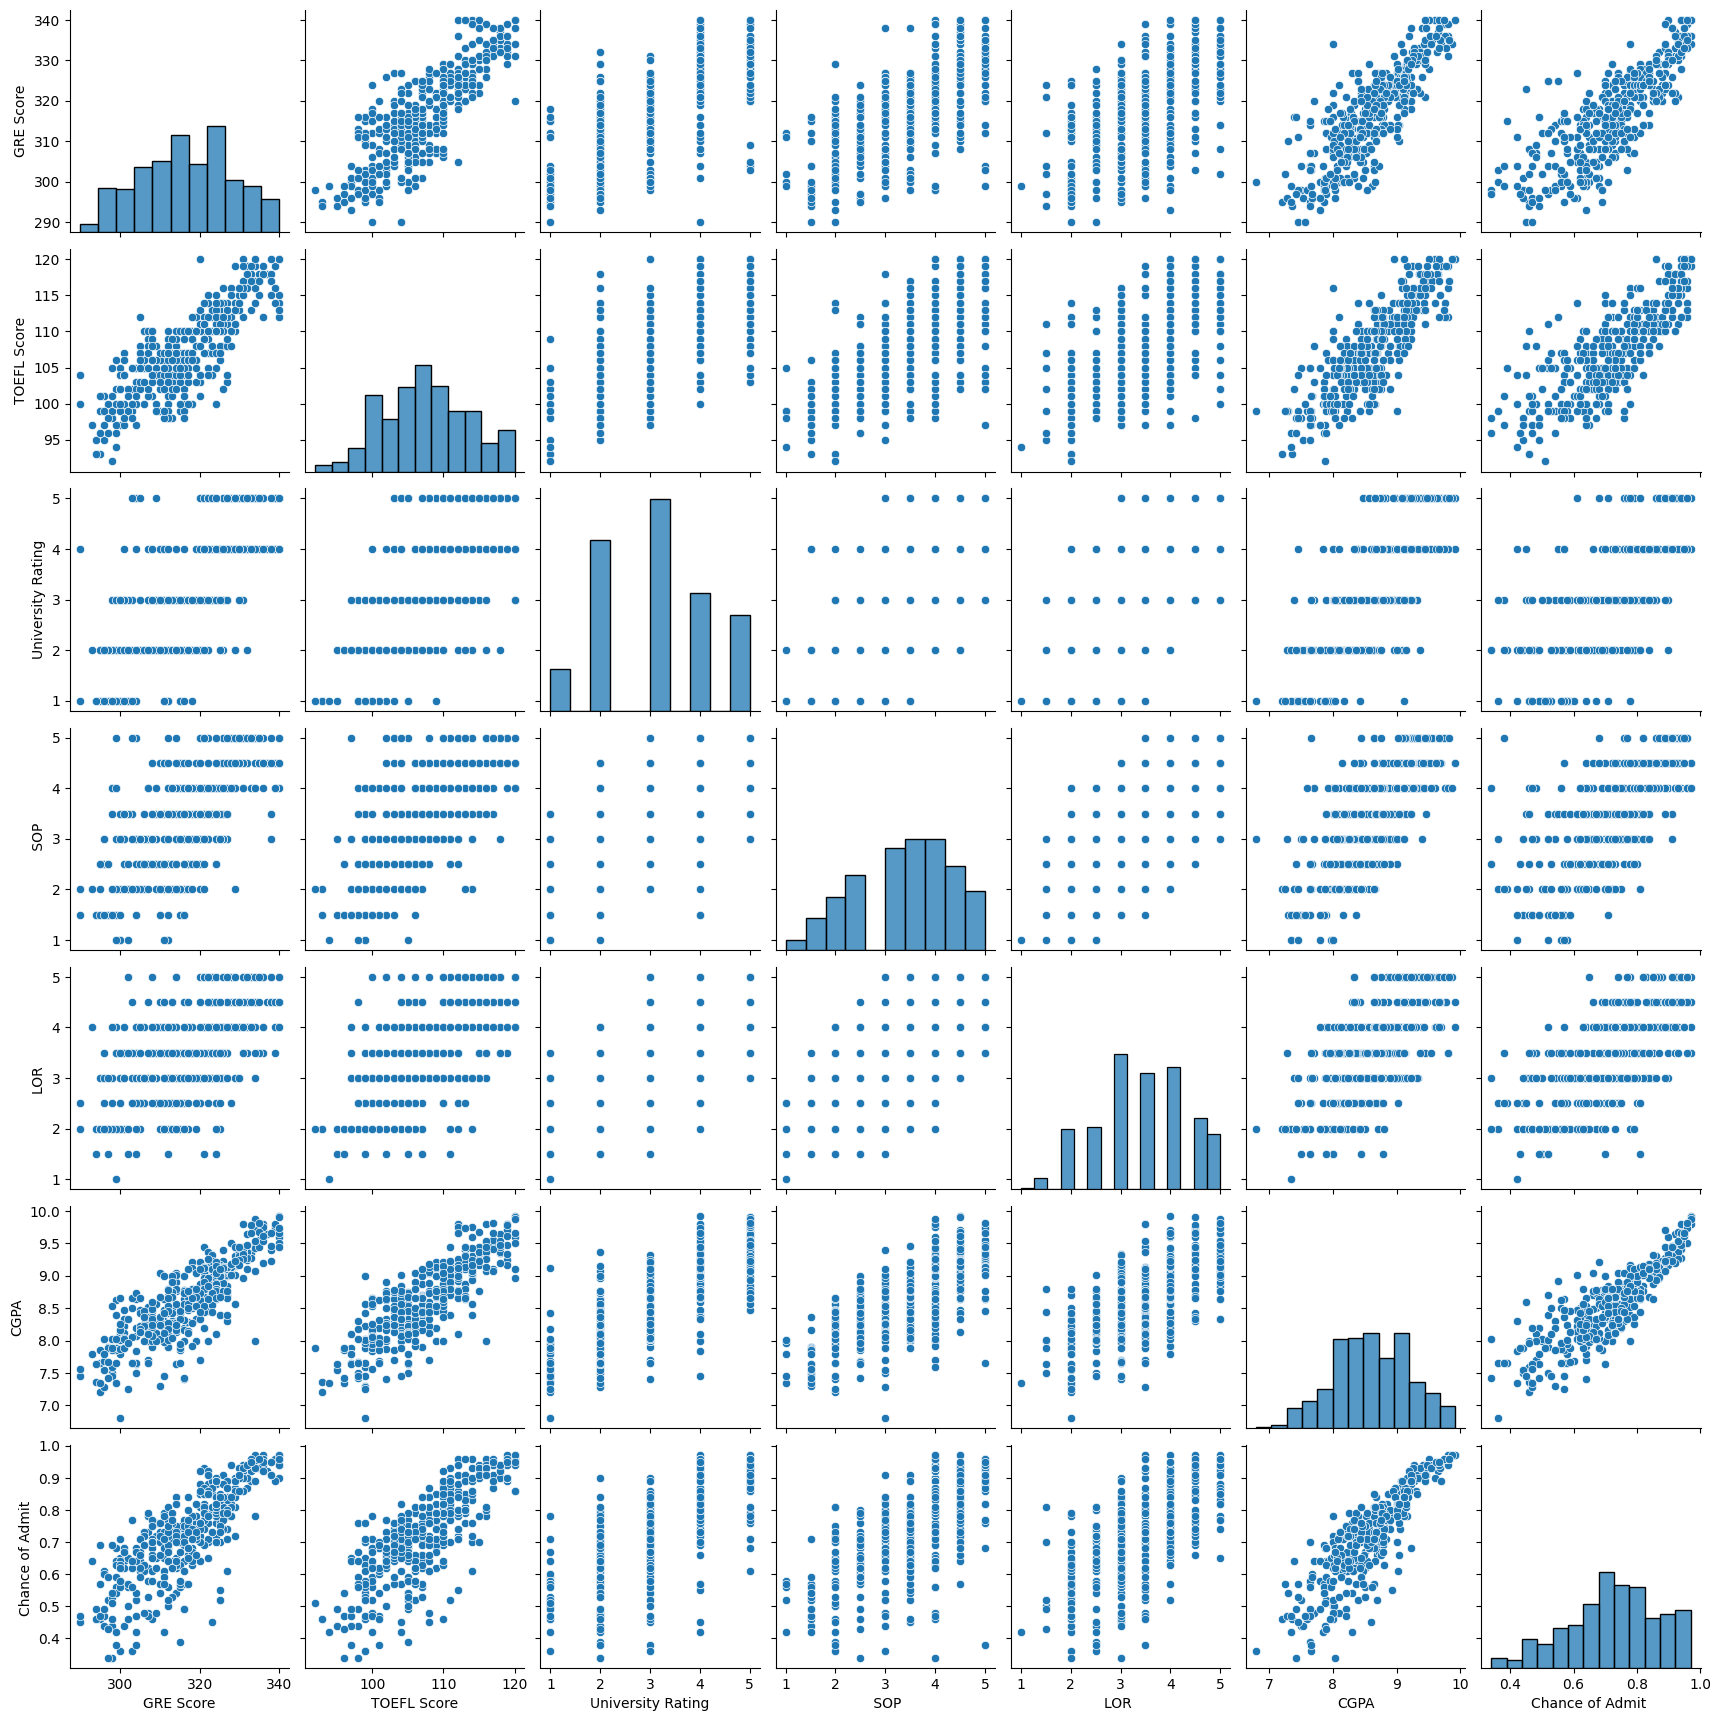

In [33]:
sns.pairplot(df)

<Axes: xlabel='GRE Score', ylabel='Density'>

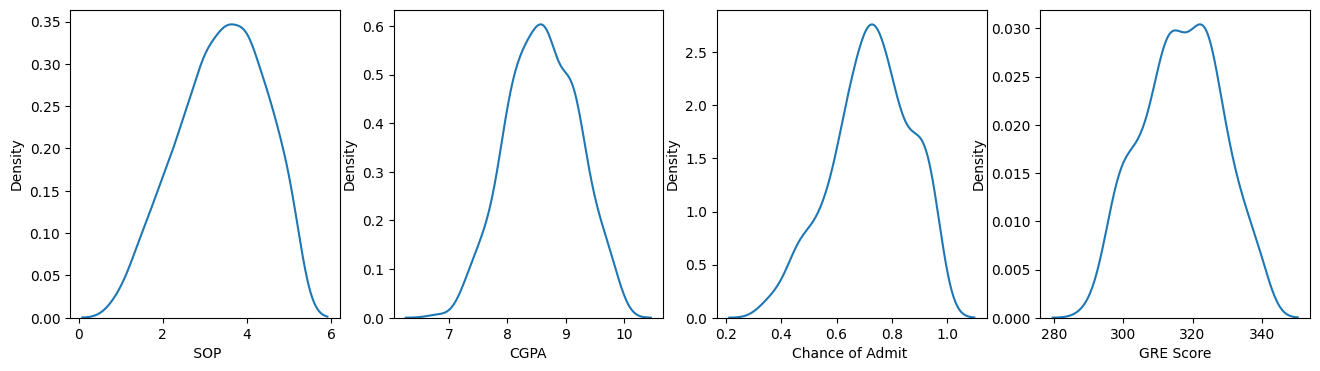

In [44]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize=(16,4))

sns.kdeplot(df[" SOP"], ax=ax1)
sns.kdeplot(df["CGPA"], ax=ax2)
sns.kdeplot(df["Chance of Admit "], ax=ax3)
sns.kdeplot(df["GRE Score"])

### Outlier Detection Using BoxPlot

<Axes: ylabel='University Rating'>

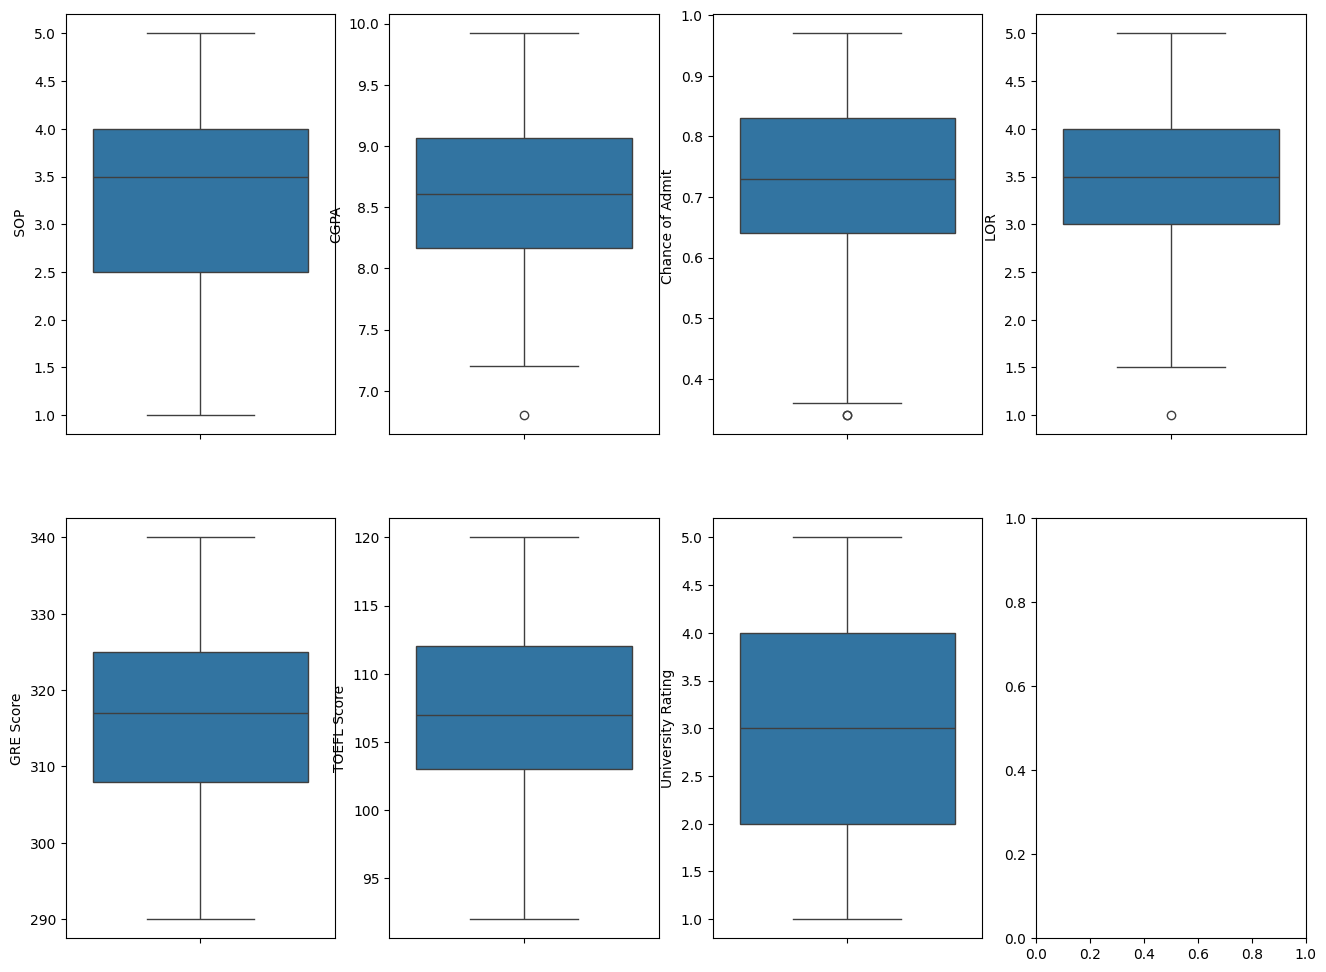

In [64]:
fig, ax = plt.subplots(2, 4, figsize=(16, 12))

# Now ax is a 2D array with shape (2, 4)
ax1 = ax[0, 0]  # First axis in the first row
ax2 = ax[0, 1]  # Second axis in the first row
ax3 = ax[1, 0]  # First axis in the second row
ax4 = ax[1, 1]  # Second axis in the second row

# Now you can use ax1, ax2, ax3, ax4 to plot
sns.boxplot(df[" SOP"], ax=ax1)
sns.boxplot(df["CGPA"], ax=ax2)
sns.boxplot(df["GRE Score"], ax=ax3)
sns.boxplot(df["TOEFL Score"], ax=ax4)
sns.boxplot(df["Chance of Admit "],ax=ax[0,2])
sns.boxplot(df["LOR "], ax=ax[0,3])
sns.boxplot(df["University Rating"], ax=ax[1,2])


In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop("Chance of Admit ", axis=1), df["Chance of Admit "], test_size=0.2, random_state=42) 

In [67]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((320, 6), (80, 6), (320,), (80,))

### Step 3: Model Training

In [69]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

### Step 4: Predict and Evaluate the Model

In [70]:
y_pred = lr.predict(X_test)

In [72]:
from sklearn.metrics import r2_score

print(r2_score(y_test, y_pred=y_pred))

0.8150996090993059


### Step 5: Y_intercept and Slope

In [ ]:
# GRE Score, TOEFL Score, University Rating, SOP, LOR, CGPA, Chance of Admit
#  y = b0 + m1b1 + m2b2 + m3b3 + m4b4 + m5b5 + m6b6

b0 = lr.intercept_
m1 = lr.coef_[0]
m2 = lr.coef_[1]
m3 = lr.coef_[2]
m4 = lr.coef_[3]
m5 = lr.coef_[4]
m6 = lr.coef_[5]

# 337	118	4	4.5	4.5	9.65	0.92 # First row of our dataset

b1 = 337        # GRE Score: 290 - 340; 
b2 = 118        # TOFEL SCORE: 92  - 120  
b3 = 4          # University Rating: 1-5
b4 = 4.5        # SOP: 1 - 5
b5 = 4.5        # LOR: 1-5
b6 = 9.65       # CGPA: 6.8 - 9.92

y = b0 + m1*b1 + m2*b2 + m3*b3 + m4*b4 + m5*b5 + m6*b6

print("Chance of Admit: ", y)

Chance of Admit:  0.9479202577073587


#### End of Task